In [1]:
# Import the usual libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Enable inline plotting at lower left
%matplotlib inline

In [2]:
import pynrc
from pynrc import nrc_utils          # Variety of useful functions and classes

# Disable informational messages and only include warnings and higher
pynrc.setup_logging(level='WARN')

**WARNING**: LOCAL JWST PRD VERSION PRDOPSSOC-034 DOESN'T MATCH THE CURRENT ONLINE VERSION PRDOPSSOC-036
Please consider updating pysiaf, e.g. pip install --upgrade pysiaf or conda update pysiaf
pyNRC log messages of level WARN and above will be shown.
pyNRC log outputs will be directed to the screen.


In [5]:
from pynrc.nrc_utils import S, source_spectrum

In [6]:
# Various Bandpasses
bp_v = S.ObsBandpass('v')
bp_k = pynrc.bp_2mass('k')
bp_w1 = pynrc.bp_wise('w1')
bp_w2 = pynrc.bp_wise('w2')

In [7]:
# Argument list:(Name,           dist, age, sptype,  mag)
args_sources = [('AUMic',        3700, 0, 4.5a),
                ('HIP17695',     16.80, 150,  'M3V',  6.93, bp_k),
                ('G7-34',        14.59, 150,  'M4V',  8.18, bp_k),
                ('TYC5899',      15.83, 130,  'M3V',  6.89, bp_k),
                ('2MJ0944-1220', 13.13,  50,  'M5V',  7.60, bp_k),
                ('APCol',         8.67,  50,  'M5V',  6.87, bp_k),
                ('FomalhautC',    7.67, 440,  'M4V',  7.21, bp_k),
                ('LP944-20',      6.42, 200,  'M9V',  9.55, bp_k),
                ('2MJ0443+0002', 21.09,  24,  'M9V', 11.22, bp_k)]

ref_sources  = [('TYC5899',      'M3V',  6.9, bp_k),
                ('TYC5899',      'M3V',  6.9, bp_k),
                ('TYC5899',      'M3V',  6.9, bp_k),
                ('HIP17695',     'M3V',  6.9, bp_k),
                ('APCol',        'M5V',  6.9, bp_k),
                ('2MJ0944-1220', 'M5V',  7.6, bp_k),
                ('APCol',        'M5V',  6.9, bp_k),
                ('2MJ0443+0002', 'M9V', 11.2, bp_k),
                ('LP944-20',     'M9V',  9.6, bp_k)]

In [10]:
bp = pynrc.read_filter('F444W')
sp = pynrc.stellar_spectrum('null', 0, 'vegamag', bp, Teff=3500, metallicity=0, log_g=4.5)

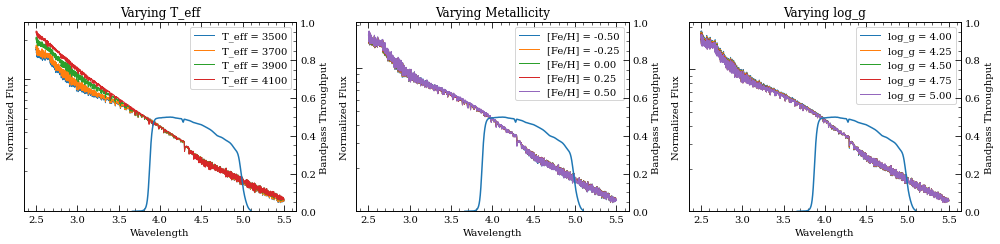

In [43]:
bp = pynrc.read_filter('F444W')

fig, axes = plt.subplots(1,3, figsize=(14,3.5))

ax = axes[0]
for teff in [3500,3700,3900,4100]:
    sp = pynrc.stellar_spectrum('null', 0, 'vegamag', bp, Teff=teff, metallicity=0, log_g=5)

    w = sp.wave / 1e4
    ind = (w>2.5) & (w<5.5)
    ax.semilogy(w[ind], sp.flux[ind], lw=1, label=f'T_eff = {teff:.0f}')
    
    ax.set_title("Varying T_eff")
    ax.legend()

ax = axes[1]
for feh in [-0.5,-0.25,0,0.25,0.5]:
    sp = pynrc.stellar_spectrum('null', 0, 'vegamag', bp, Teff=3500, metallicity=feh, log_g=5)

    w = sp.wave / 1e4
    ind = (w>2.5) & (w<5.5)
    ax.semilogy(w[ind], sp.flux[ind], lw=1, label=f'[Fe/H] = {feh:.2f}')
    
    ax.set_title("Varying Metallicity")
    ax.legend()


ax = axes[2]
for lg in [4,4.25,4.5,4.75,5]:
    sp = pynrc.stellar_spectrum('null', 0, 'vegamag', bp, Teff=3500, metallicity=0, log_g=lg)

    w = sp.wave / 1e4
    ind = (w>2.5) & (w<5.5)
    ax.semilogy(w[ind], sp.flux[ind], lw=1, label=f'log_g = {lg:.2f}')
    
    ax.set_title("Varying log_g")
    ax.legend()
    
for ax in axes:
    ax.set_yticklabels([])
    ax.set_xlabel('Wavelength')
    ax.set_ylabel('Normalized Flux')

    ax2 = ax.twinx()
    ax2.plot(bp.wave/1e4, bp.throughput)
    ax2.set_ylim(0,1)
    ax2.set_ylabel('Bandpass Throughput')
    
fig.tight_layout()